<a href="https://colab.research.google.com/github/manjunath1005/Anomaly_detection-streamlit/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#isolation forest
from sklearn.ensemble import IsolationForest

#install ucimlrepo
!pip install ucimlrepo

#importing dataset
from ucimlrepo import fetch_ucirepo

In [34]:
#load dataset
air_quality = fetch_ucirepo(id=360)

In [35]:
air_quality

{'data': {'ids': None,
  'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
  0     3/10/2004  18:00:00     2.6         1360       150      11.9   
  1     3/10/2004  19:00:00     2.0         1292       112       9.4   
  2     3/10/2004  20:00:00     2.2         1402        88       9.0   
  3     3/10/2004  21:00:00     2.2         1376        80       9.2   
  4     3/10/2004  22:00:00     1.6         1272        51       6.5   
  ...         ...       ...     ...          ...       ...       ...   
  9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
  9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
  9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
  9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
  9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   
  
        PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
  0              1046      

In [36]:
# converting to DataFrame
data=air_quality.data.features

In [37]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [38]:
df = data[['CO(GT)',"C6H6(GT)",'NOx(GT)','NO2(GT)']].copy()

df

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116
...,...,...,...,...
9352,3.1,13.5,472,190
9353,2.4,11.4,353,179
9354,2.4,12.4,293,175
9355,2.1,9.5,235,156


In [39]:
df.isnull().sum()

,0
CO(GT),0
C6H6(GT),0
NOx(GT),0
NO2(GT),0


In [40]:
df.dtypes

,0
CO(GT),float64
C6H6(GT),float64
NOx(GT),int64
NO2(GT),int64


In [41]:
#parameter for isolation forest
n_estimators = 100  # no.of trees in the forest
contamination = 0.01  # percentage of outliers in the data
sample_size = 256

In [42]:
model=IsolationForest(n_estimators=n_estimators, contamination=contamination,max_samples=sample_size, random_state=42)

In [43]:
model.fit(df)

anomaly_labels=model.predict(df)
# anomaly_labels will be -1 for anaomalies and 1 for normal data points

df['anomaly']=anomaly_labels

In [44]:
df['anomaly'].value_counts()

,count
anomaly,
1,9263
-1,94


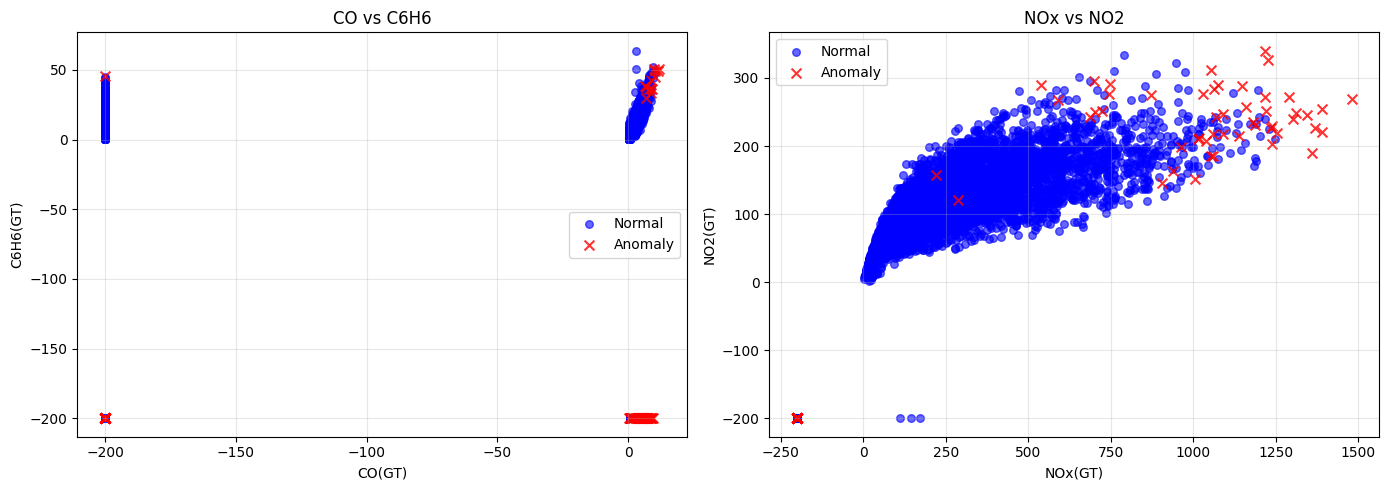

Normal data points: 9263
Anomalous data points: 94


In [45]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,5))

normal=df[df['anomaly']==1]
anomaly=df[df['anomaly']==-1]

#plot1 : CO vs C6H6
axes[0].scatter(normal['CO(GT)'],normal["C6H6(GT)"],color='blue',label='Normal',alpha=0.6,s=30)
axes[0].scatter(anomaly['CO(GT)'],anomaly["C6H6(GT)"],color='red',label='Anomaly',alpha=0.8,s=50,marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].legend()
axes[0].set_title('CO vs C6H6')
axes[0].grid(True,alpha=0.3)

#plot2 :NOx vs NO2
axes[1].scatter(normal['NOx(GT)'],normal["NO2(GT)"],color='blue',label='Normal',alpha=0.6,s=30)
axes[1].scatter(anomaly['NOx(GT)'],anomaly["NO2(GT)"],color='red',label='Anomaly',alpha=0.8,s=50,marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].legend()
axes[1].set_title('NOx vs NO2')
axes[1].grid(True,alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Normal data points: {len(normal)}")
print(f"Anomalous data points: {len(anomaly)}")


In [46]:
#saved model same folder
import joblib
model_path='/content/drive/MyDrive/Colab Notebooks/isolation_forest_model.pkl'
joblib.dump(model, model_path)

['/content/drive/MyDrive/Colab Notebooks/isolation_forest_model.pkl']